<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0105EN-SkillsNetwork/labs/Module2/images/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


In [3]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()  # Muestra las primeras 5 filas


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL de los ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Enviar solicitud con encabezado de navegador
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

# Parsear el HTML con BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Encontrar todas las tablas
tables = soup.find_all("table")

# Seleccionar la segunda tabla (basado en la estructura típica del sitio)
tesla_revenue = pd.read_html(str(tables[1]))[0]

# Renombrar columnas y limpiar
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()


<ipython-input-5-e686243a9163>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[1]))[0]


,Date,Revenue
58,2010-09-30,$31
59,2010-06-30,$28
60,2010-03-31,$21
62,2009-09-30,$46
63,2009-06-30,$27


In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()  # Muestra las primeras 5 filas


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL de ingresos de GameStop
url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Usar un User-Agent válido
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url_gme, headers=headers)

# Parsear HTML
soup = BeautifulSoup(response.text, "html.parser")

# Buscar todas las tablas
tables = soup.find_all("table")

# Extraer la tabla correcta
gme_revenue = pd.read_html(str(tables[1]))[0]

# Limpiar columnas
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue.dropna(inplace=True)

# Mostrar las últimas 5 filas
gme_revenue.tail()


<ipython-input-8-ef30f5ed9df1>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(tables[1]))[0]


,Date,Revenue
60,2010-01-31,"$3,524"
61,2009-10-31,"$1,835"
62,2009-07-31,"$1,739"
63,2009-04-30,"$1,981"
64,2009-01-31,"$3,492"


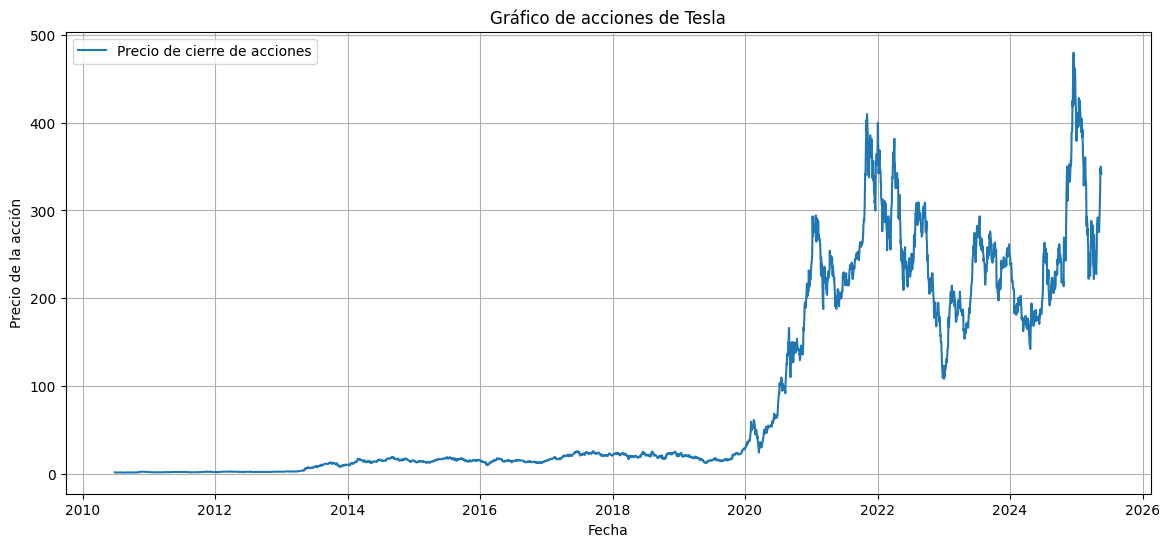

In [9]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14,6))
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Precio de cierre de acciones')
    ax1.set_title(title)
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de la acción')
    plt.grid(True)
    plt.legend()
    plt.show()

make_graph(tesla_data, tesla_revenue, "TSLA", "Gráfico de acciones de Tesla")


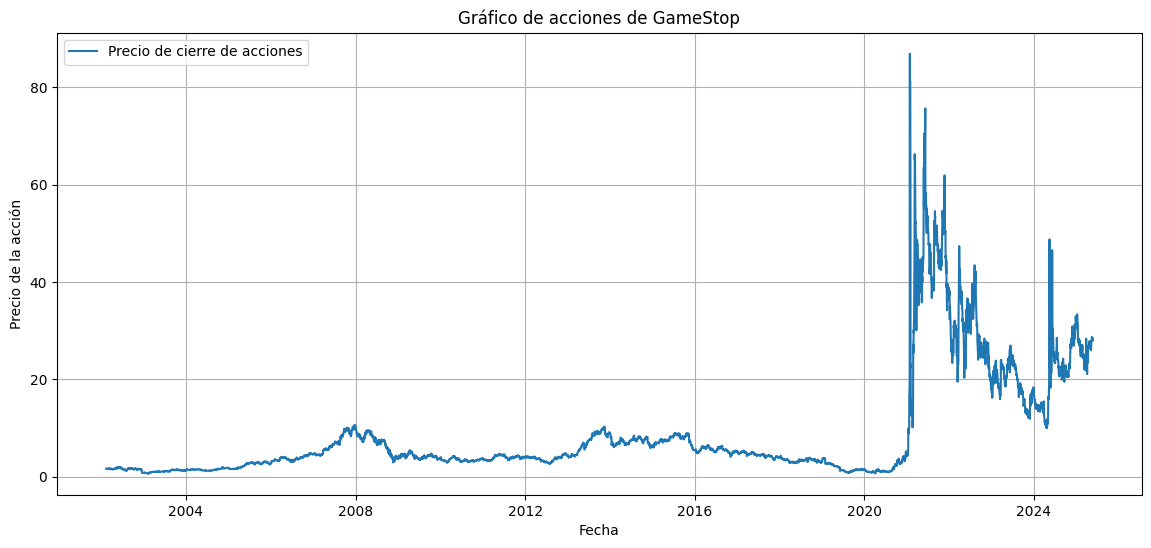

In [10]:
make_graph(gme_data, gme_revenue, "GME", "Gráfico de acciones de GameStop")
